In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.spatial.distance import cdist
from sklearn import tree, preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import plot_confusion_matrix, log_loss, silhouette_score, silhouette_samples, \
    calinski_harabasz_score, davies_bouldin_score, homogeneity_score, completeness_score, v_measure_score, \
    adjusted_mutual_info_score, mean_squared_error
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.random_projection import GaussianRandomProjection
from sklearn.tree import plot_tree
from sklearn.utils import shuffle
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance
import scipy.stats as stats
from scipy.stats import kurtosis
import time
import warnings
import time
import forestci as fci
from sklearn.neural_network import MLPClassifier
from sklearn.metrics.cluster import adjusted_rand_score

# warnings.filterwarnings("ignore")

def k_means(n_clust, data_frame, true_labels):
    """
    Function k_means applies k-means clustering alrorithm on dataset and prints the crosstab of cluster and actual labels 
    and clustering performance parameters.
    
    Input:
    n_clust - number of clusters (k value)
    data_frame - dataset we want to cluster
    true_labels - original labels
    
    Output:
    1 - crosstab of cluster and actual labels
    2 - performance table
    """
    k_means = KMeans(n_clusters = n_clust, random_state=123, n_init=30)
    k_means.fit(data_frame)
    c_labels = k_means.labels_
    df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
    ct = pd.crosstab(df['clust_label'], df['orig_label'])
    y_clust = k_means.predict(data_frame)
    display(ct)
    print('% 9s' % 'inertia  homo    compl   v-meas   ARI     AMI     silhouette')
    print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
      %(k_means.inertia_,
      homogeneity_score(true_labels, y_clust),
      completeness_score(true_labels, y_clust),
      v_measure_score(true_labels, y_clust),
      adjusted_rand_score(true_labels, y_clust),
      adjusted_mutual_info_score(true_labels, y_clust),
      silhouette_score(data_frame, y_clust, metric='euclidean')))

def pca_transform(n_comp, X):
    pca = PCA(n_components=n_comp, random_state=123)
#     global Data_reduced
    Data_reduced = pca.fit_transform(X)
    print('Shape of the new Data df: ' + str(Data_reduced.shape))
    return Data_reduced



def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

import warnings
# warnings.filterwarnings("ignore")

data = pd.read_csv("train_2.csv")
data_test = pd.read_csv("test_2.csv")


both_df = pd.concat([data, data_test], axis=0).reset_index(drop=True)
both_df.drop(["subject"], axis=1, inplace=True)
both_df = shuffle(both_df)

std_scaler = StandardScaler()
copy_both_df = both_df.copy()
X = both_df.loc[:, both_df.columns != "Activity"]
std_scaler.fit(X)
X_scaled = std_scaler.fit_transform(X)
y = both_df.Activity


y_encode = LabelEncoder().fit_transform(y)
labels = preprocessing.LabelEncoder().fit(y).classes_

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encode, random_state=2, test_size=.3, stratify=y)

print("Starting Cross Validation")

C:\Users\Stephen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
Failed to import duecredit due to No module named 'duecredit'
C:\Users\Stephen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


Starting Cross Validation


(561,)
0.994173949230129
0.9744336569579288
Feature ranking:


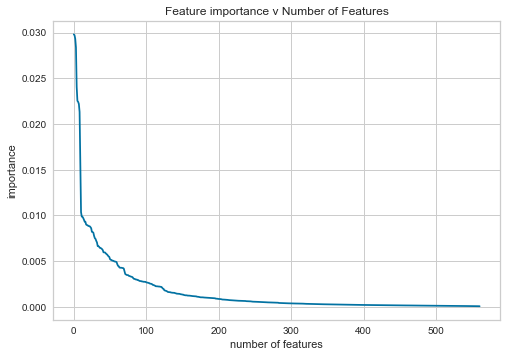

done


C:\Users\Stephen\anaconda3\lib\site-packages\forestci\calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
C:\Users\Stephen\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Stephen\anaconda3\lib\site-packages\forestci\calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
C:\Users\Stephen\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


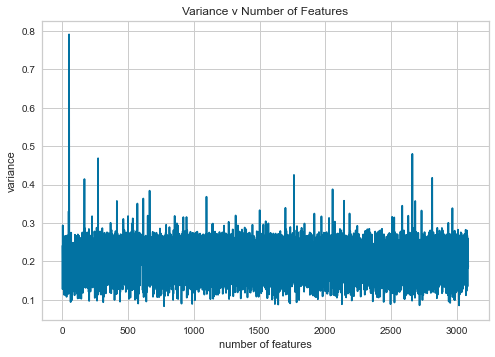

In [4]:
rf = RandomForestClassifier(n_estimators=1000,
                            n_jobs=-1,
                            max_depth=10,
                            min_samples_split=5,
                            oob_score=True,
                            warm_start=True)
rf.fit(X_train, y_train)
print(rf.feature_importances_.shape)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))
#print(np.sort(rf.feature_importances_))

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
features = []
for f in range(X_train.shape[1]):
    features.append(importances[indices[f]])
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.plot(features)
plt.xlabel('number of features')
plt.ylabel('importance')
plt.title("Feature importance v Number of Features")
plt.show()

# result = permutation_importance(rf, X_test, y_test, n_repeats=2,
#                                 random_state=42, n_jobs=-1)
# sorted_idx = result.importances_mean.argsort()
# plt.plot(sorted_idx)
# plt.xlabel('number of features')
# plt.ylabel('permutation importance')
# plt.title("Feature permutation importance v Number of Features")
# plt.show()
print("done")

variance = fci.random_forest_error(rf, X_train,
                                             X_test)
plt.plot(variance)
plt.xlabel('number of features')
plt.ylabel('variance')
plt.title("Variance v Number of Features")
plt.show()

In [ ]:
skf = StratifiedKFold(n_splits = 5)
# dtc = tree.DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_split= 10, random_state = 2)
#
# scoring = {'precision_weighted':make_scorer(precision_score, average='weighted'),
#  		   'Accuracy': make_scorer(accuracy_score)}
#kmeans = KMeans()
scoring = {'precision_weighted':make_scorer(precision_score, average='weighted'),
 		   'Accuracy': make_scorer(accuracy_score)}
#parameters = {'max_depth': [5, 10, 15, 20],'min_samples_split':[10, 15, 17, 20, 25]}
parameters = {'n_clusters': range(1,10), 'n_init': [10]), 'random_state': [1],
              'n_jobs':[-1], 'algorithm': ['auto']}
clf = GridSearchCV(return_train_score=True, estimator=KMeans(),
				   param_grid=parameters, cv=skf, n_jobs=-1,
 				   scoring=scoring, refit='precision_weighted')

clf.fit(X=X_scaled, y=y_encode)
results = clf.cv_results_
print(results)

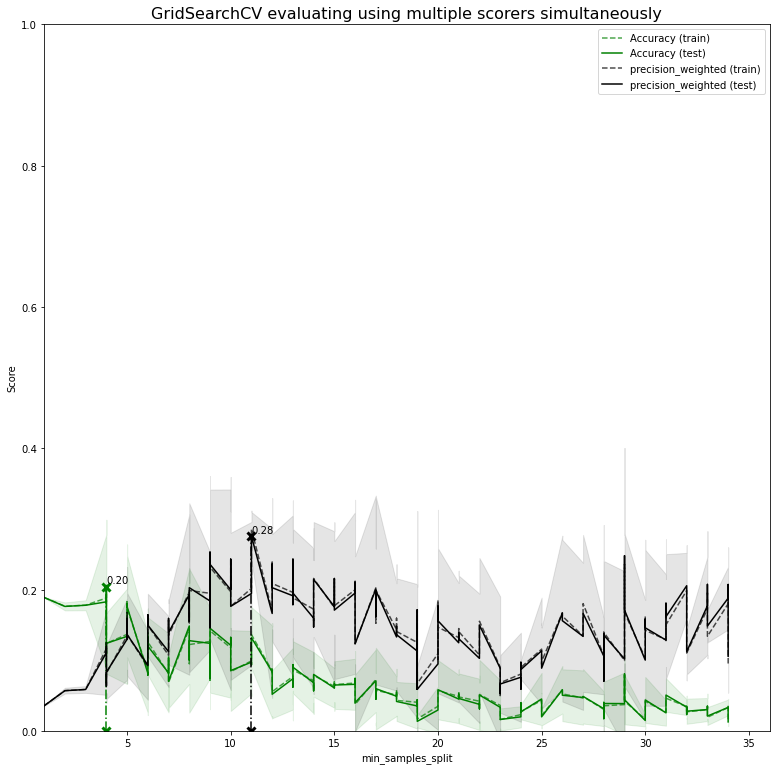

In [9]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(1, 36)
ax.set_ylim(0, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_n_clusters'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
	for sample, style in (('train', '--'), ('test', '-')):
		sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
		sample_score_std = results['std_%s_%s' % (sample, scorer)]
		ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
		ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

	best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
	best_score = results['mean_test_%s' % scorer][best_index]

	# Plot a dotted vertical line at the best score for that scorer marked by x
	ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

	# Annotate the best score for that scorer
	ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

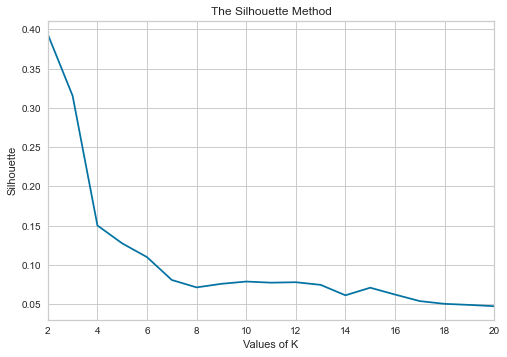

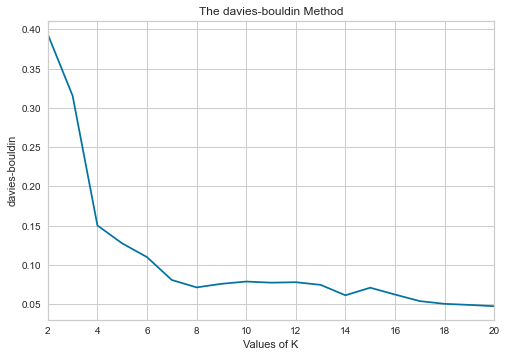

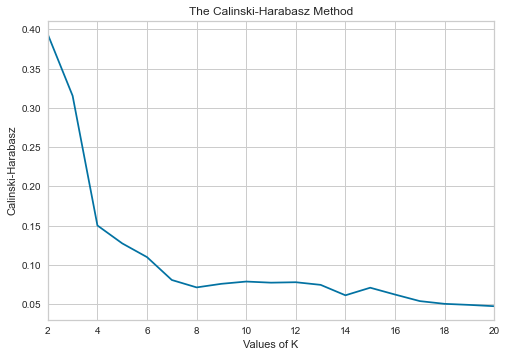

best silhouette : 0.39373247640770803  k value : 2
best distortion : 0  k value : 2
best inertia : 0.39373247640770803  k value : 2


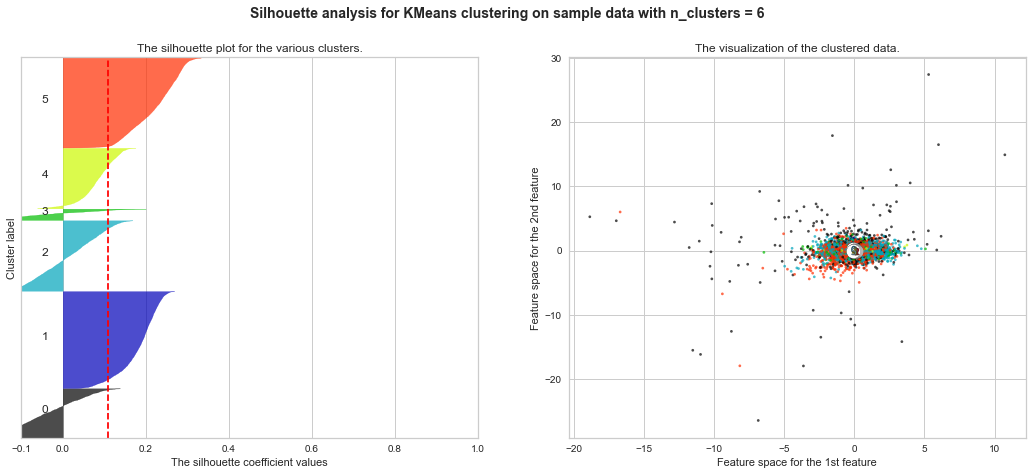

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import tree, preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import plot_confusion_matrix, log_loss, silhouette_score, silhouette_samples
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.utils import shuffle
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encode, random_state=2, test_size=.3, stratify=y_encode)
# dtc.fit(X_train, y_train)
#
# y_probas = dtc.predict_proba(X_test)
# y_temp = log_loss(y_test, y_probas)
# print("log loss: ", y_temp)
#
# fig, ax = plt.subplots(figsize=(30, 30))
# plot_tree(dtc, filled=True, fontsize=10)
# plt.show()
#
# print(" Score Train: ", dtc.score(X_train, y_train), " Tree Depth: ", dtc.get_depth())
# print(" Score Test: ", dtc.score(X_test, y_test))
#
# np.set_printoptions(precision=2)
#
# # Plot non-normalized confusion matrix
# titles_options = [("Testing Confusion matrix, without normalization", None),
#                   ("Testing Normalized confusion matrix", 'true')]
# for title, normalize in titles_options:
# 	disp = plot_confusion_matrix(dtc, X_test, y_test,
#                                  display_labels=labels,
#                                  cmap=plt.cm.Blues,
#                                  normalize=normalize)
# 	disp.ax_.set_title(title)
# 	plt.show()
#
# 	print(title)
# 	print(disp.confusion_matrix)
#
# titles_options = [("Training Confusion matrix, without normalization", None),
#                   ("Training Normalized confusion matrix", 'true')]
# for title, normalize in titles_options:
# 	disp = plot_confusion_matrix(dtc, X_train, y_train,
#                                  display_labels=labels,
#                                  cmap=plt.cm.Blues,
#                                  normalize=normalize)
# 	disp.ax_.set_title(title)
# 	plt.show()
#
# 	print(title)
# 	print(disp.confusion_matrix)
#

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
range_n_clusters = range(2,21)
silhouette = []
distortion = []
inertia = []
ch = []
db = []
best_silhouette = 0
temp_silhouette = 0
k_silhouette = 0

best_distortion = 99999999
temp_distortion = 0
k_distortion = 0

best_inertia = 99999999
temp_inertia = 0
k_inertia = 0
for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1, algorithm='auto', max_iter=1000)
    cluster_labels = clusterer.fit_predict(X_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_scaled, cluster_labels, metric='euclidean')
    ch_avg = calinski_harabasz_score(X_scaled, cluster_labels)
    db_avg = davies_bouldin_score(X_scaled, cluster_labels)
    distortion_score = sum(np.min(cdist(X_scaled, clusterer.cluster_centers_,
                      'euclidean'),axis=1)) / X_scaled.shape[0]
    silhouette.append(silhouette_avg)
    distortion.append(distortion_score)
    inertia.append(clusterer.inertia_)
    ch.append(ch_avg)
    db.append(db_avg)
    temp_silhouette = silhouette_avg
    if temp_silhouette > best_silhouette:
        best_silhouette = temp_silhouette
        k_silhouette = n_clusters
    if temp_distortion < best_distortion:
        best_distortion = temp_distortion
        k_distortion = n_clusters
    if temp_inertia < best_inertia:
        best_inertia = temp_inertia
        k_inertia = n_clusters
#
# plt.plot(range_n_clusters, inertia, 'bx-')
# plt.xlabel('Values of K')
# plt.ylabel('Inertia')
# plt.xlim(2, 20)
# plt.title('The Elbow Method using Inertia')
# plt.show()
#
# plt.plot(range_n_clusters, distortion, 'bx-')
# plt.xlabel('Values of K')
# plt.ylabel('Distortion')
# plt.xlim(2, 20)
# plt.title('The Elbow Method using Distortion')
# plt.show()

plt.plot(range_n_clusters, silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette')
plt.xlim(2, 20)
plt.title('The Silhouette Method')
plt.show()
plt.plot(range_n_clusters, silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('davies-bouldin')
plt.xlim(2, 20)
plt.title('The davies-bouldin Method')
plt.show()
plt.plot(range_n_clusters, silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Calinski-Harabasz')
plt.xlim(2, 20)
plt.title('The Calinski-Harabasz Method')
plt.show()

print("best silhouette :", best_silhouette, " k value :", k_silhouette)
print("best distortion :", best_distortion, " k value :", k_distortion)
print("best inertia :", best_silhouette, " k value :", k_inertia)

k_silhouette = 6
 # Compute the silhouette scores for each sample
clusterer = KMeans(n_clusters=k_silhouette, random_state=1, algorithm='auto', max_iter=1000)
cluster_labels = clusterer.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, cluster_labels, metric='euclidean')
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X_scaled) + (k_silhouette + 1) * 10])
y_lower = 10
for i in range(k_silhouette):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / k_silhouette)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / k_silhouette)
ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % k_silhouette),
             fontsize=14, fontweight='bold')

plt.show()

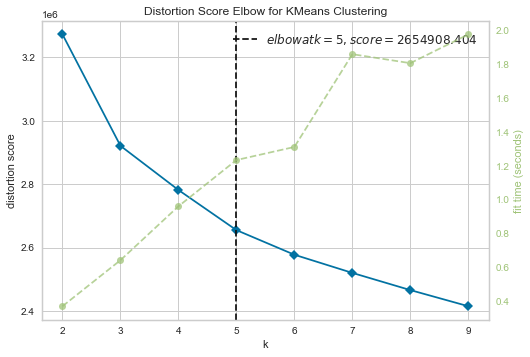

In [39]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,20), metric='distortion')

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()

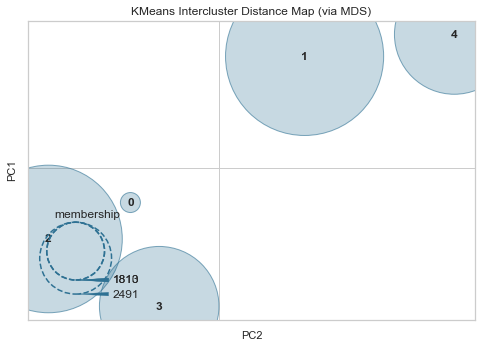

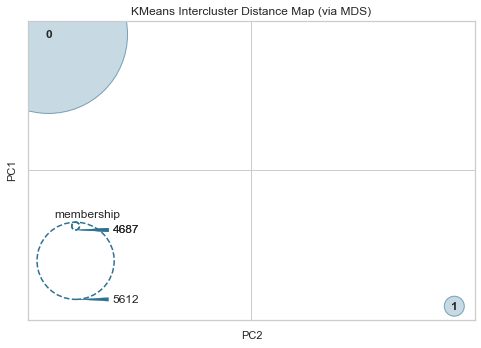

In [2]:
model = KMeans(5)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

model = KMeans(2)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

C:\Users\Stephen\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Stephen\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Stephen\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


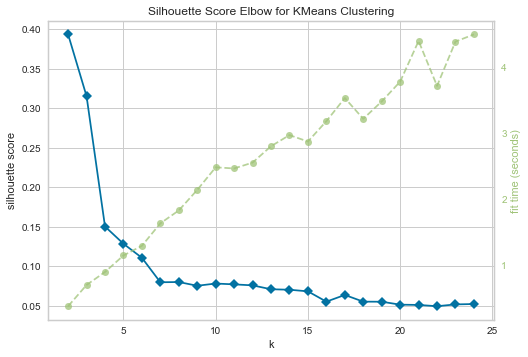

In [48]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,20), metric='silhouette', locate_elbow=True)

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()


before cluster here
before cluster here
before cluster here
before cluster here
before cluster here
before cluster here
before cluster here
before cluster here
before cluster here
before cluster here
before cluster here
before cluster here
before cluster here
before cluster here
before cluster here
before cluster here
before cluster here
before cluster here
here


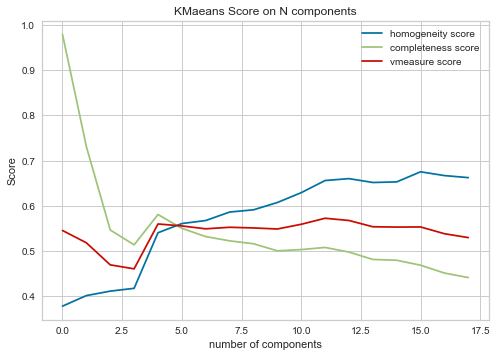

done


In [3]:
range_n_clusters = range(2, 20)
hscore = []
cscore = []
vscore = []
adjscore = []
for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1, algorithm='auto', max_iter=1000)
    cluster_labels = clusterer.fit(X_scaled)

    homogeneityscore = homogeneity_score(y_encode, cluster_labels.labels_)
    completenessscore = completeness_score(y_encode, cluster_labels.labels_)
    vmeasurescore = v_measure_score(y_encode, cluster_labels.labels_)
    
    hscore.append(homogeneityscore)  
    cscore.append(completenessscore)
    vscore.append(vmeasurescore) 
plt.plot(hscore, label = "homogeneity score")
plt.plot(cscore, label = "completeness score")
plt.plot(vscore, label = "vmeasure score")

plt.xlabel('number of components')
plt.ylabel('Score')
plt.legend()
plt.title("KMaeans Score on N components")
plt.show()   
print('done')


In [5]:
signals = X_train
print (signals.shape)
responses = y_train
#-------------------------------------------

#-------------------------------------------
# Performing standardization and PCA
#-------------------------------------------
thresholds = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
for var_threshold in thresholds:
    # var_threshold = 0.98 # minimum percentage of variance we want to be described by the resulting transformed components
    pca_obj = PCA(n_components=var_threshold) # Create PCA object
    signals_Transformed = pca_obj.fit_transform(StandardScaler().fit_transform(signals)) # Transform the initial features
    columns = ['comp_' + str(n) for n in range(1,signals_Transformed.shape[1]+1)] #create a list of columns
    transf_signals_df = pd.DataFrame(signals_Transformed, columns=columns) # Create a data frame from the PCA'd data
    transf_input_df = transf_signals_df.copy()
    transf_input_df['response'] = responses #create a full dataframe (including the response) out of the transformed features
    #-------------------------------------------
    print (signals_Transformed.shape)

(7209, 561)
(7209, 65)
(7209, 71)
(7209, 78)
(7209, 85)
(7209, 94)
(7209, 104)
(7209, 115)
(7209, 130)
(7209, 150)
(7209, 181)


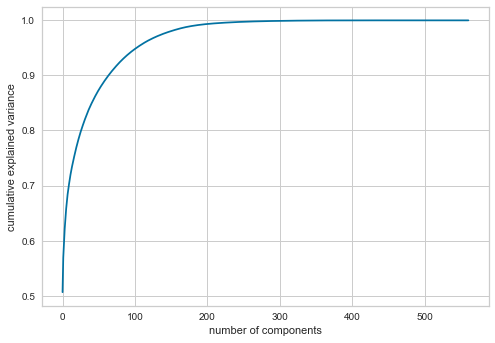

PCA mean shape X from source:  (2,)
PCA Mean shape X train:  (561,)


[(-3.0, 3.1),
 Text(0, 0.5, 'component 2'),
 (-5.0, 5.0),
 Text(0.5, 0, 'component 1'),
 Text(0.5, 1.0, 'principal components')]

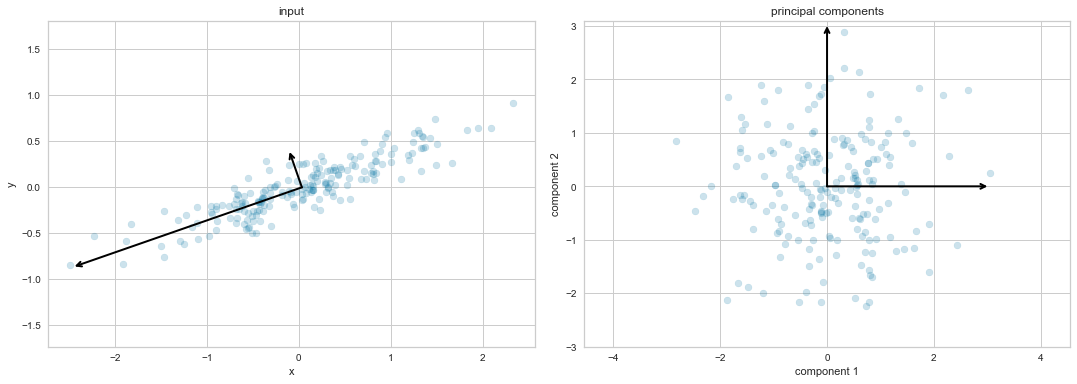

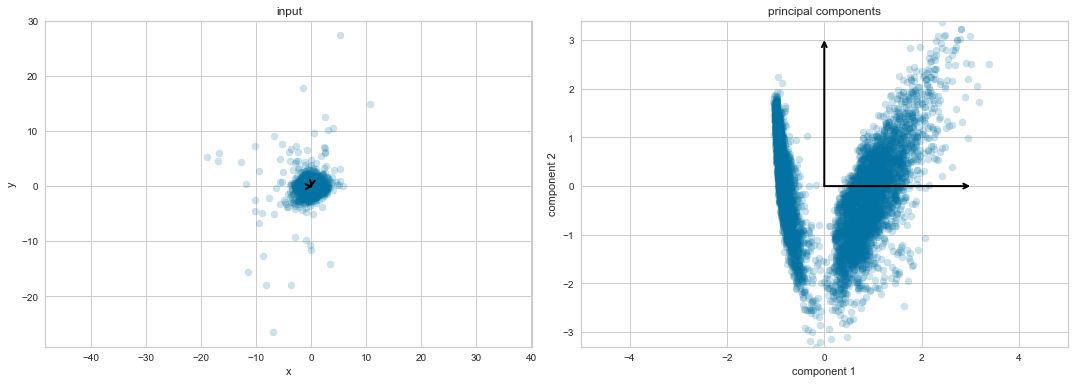

In [45]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

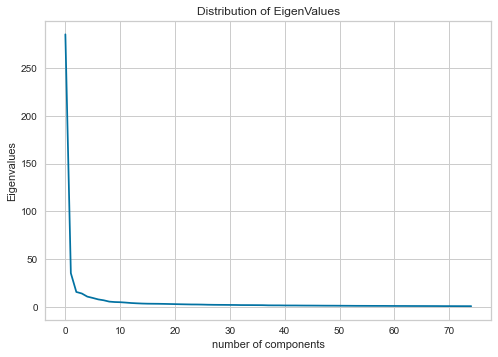

[285.04997682  35.29883734  15.66048974  14.05408276  10.79505937
   9.3938366    7.87042764   6.94503184   5.56694523   5.12336639
   4.94934891   4.55986859   4.09451257   3.79377827   3.54448567
   3.39093502   3.3336087    3.27639667   3.17909607   3.05651935
   2.93696036   2.79826037   2.69210188   2.58091326   2.5529875
   2.45483642   2.31439345   2.22807547   2.17691378   2.14958678
   2.08757323   2.05301113   1.9431124    1.92767398   1.90853701
   1.87043069   1.83118835   1.6727555    1.6378162    1.63345283
   1.54945523   1.51826293   1.51576488   1.46836662   1.43297477
   1.41819318   1.38548526   1.3388931    1.31687038   1.3055716
   1.26655033   1.2319987    1.20310543   1.15408992   1.14428208
   1.12997931   1.10316044   1.09005539   1.08650691   1.053137
   1.02749211   1.00437689   1.00324506   0.97147753   0.95872233
   0.95365324   0.93640126   0.92623069   0.90740961   0.86687127
   0.86149038   0.85041852   0.82971266   0.818985     0.80625408]


In [57]:
# We center the data and compute the sample covariance matrix.
pca = PCA(n_components=75).fit(X_train)
plt.plot(pca.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('Eigenvalues')
plt.title("Distribution of EigenValues")
plt.show()

print(pca.explained_variance_)

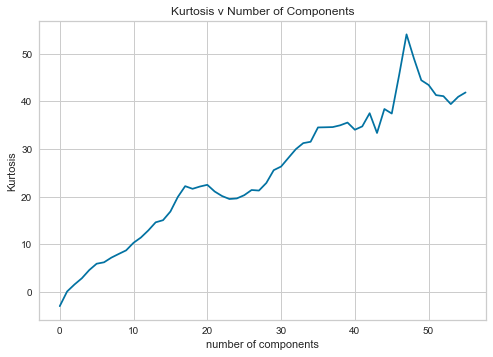

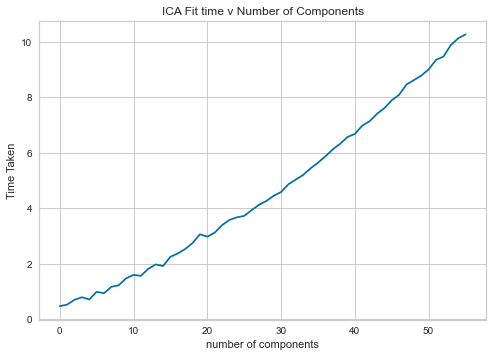

In [15]:
components = np.arange(0, 560, 10).tolist()
components[0] = 1
# components = range(1,560)
times = []
# print(components)
avg_kur_scores = []
for n_components in components:
    t1 = time.time()
    ica = FastICA(max_iter=100, algorithm='parallel', n_components=n_components).fit(X_train)
    t2 = time.time()
    times.append(-(t1-t2))
    kur = kurtosis(ica.components_, axis=0)
    avg_kur = np.average(kur)
    avg_kur_scores.append(avg_kur)
    # print(avg_kur)

plt.plot(avg_kur_scores)
plt.xlabel('number of components')
plt.ylabel('Kurtosis')
plt.title("Kurtosis v Number of Components")
plt.show()

plt.plot(times)
plt.xlabel('number of components')
plt.ylabel('Time Taken')
plt.title("ICA Fit time v Number of Components")
plt.show()

# print(kur)
# print(ica.components_.shape)
# print(kur.shape)
# print(np.average(kur))
# ica = FastICA(max_iter=1000, algorithm='parallel', fun='exp', n_components=300).fit(X_train)
# print("done")
# ica = FastICA(max_iter=1000, algorithm='parallel', fun='cube',n_components=300).fit(X_train)
# print("done")

In [8]:
print(X_train.shape)

t1 = time.time()
ica = FastICA(max_iter=100, algorithm='parallel', n_components=500).fit(X_train)
t2 = time.time()
print('time: ', -(t1-t2))
print(ica.components_.shape)

(7209, 561)
time:  99.67760801315308
(561, 561)


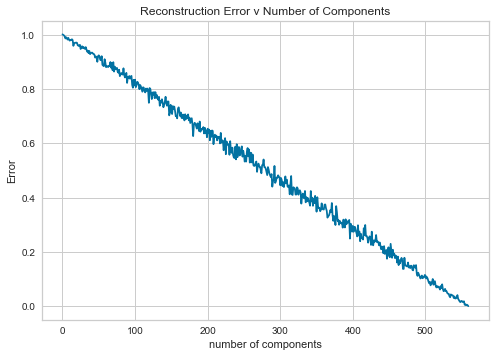

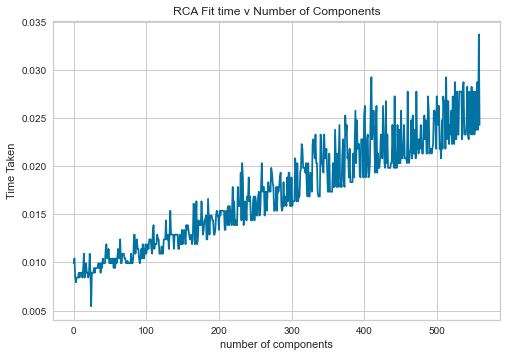

In [33]:
errors = []
times = []
n_components = range(1, 561)
for n_component in n_components:
    rca = GaussianRandomProjection(n_components=n_component)
    t1 = time.time()
    rp = rca.fit_transform(X_train)
    t2 = time.time()
    times.append(-(t1-t2))
    inverse_data = np.linalg.pinv(rca.components_.T)
    reconstructed_data = rp.dot(inverse_data)
    error = mean_squared_error(X_train, reconstructed_data)
    errors.append(error)

plt.plot(errors)
plt.xlabel('number of components')
plt.ylabel('Error')
plt.title("Reconstruction Error v Number of Components")
plt.show()

plt.plot(times)
plt.xlabel('number of components')
plt.ylabel('Time Taken')
plt.title("RCA Fit time v Number of Components")
plt.show()

271
217
262
220
242
234
275
233
214
251
287
233
224
267
208
232
223
231
217
205
221
208
236
223
273
225
220
245
248
294
248
218
269
229
238
233
230
216
205
230
258
223
213
263
234
216
217
255
266
232
253
225
223
211
248
229


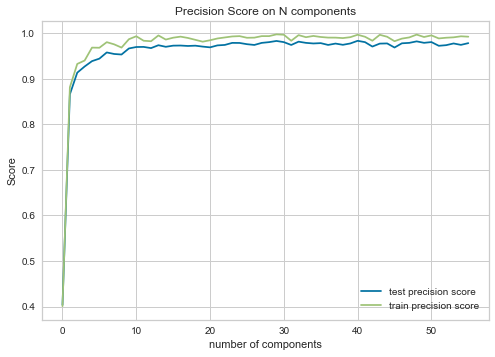

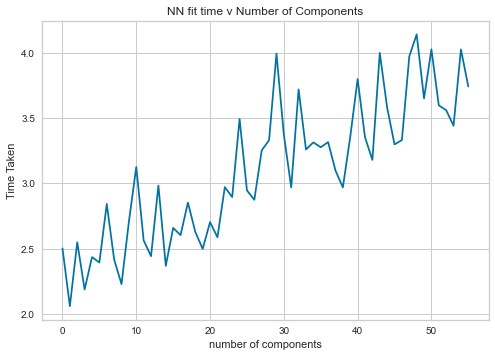

In [20]:
components = np.arange(0, 560, 10).tolist()
scores_train = []
scores_test = []
components[0] = 1
times = []
nn = MLPClassifier(activation='logistic', hidden_layer_sizes=25,
				   learning_rate_init=.3, solver='sgd', learning_rate='adaptive',
				   n_iter_no_change=20, early_stopping=True, max_iter=1000, momentum=0.3)
for component in components:
    pca = PCA(n_components=component).fit(X_train)
    pca_train = pca.transform(X_train)
    t1 = time.time()
    nn.fit(pca_train, y_train)
    t2 = time.time()
    times.append(-(t1-t2))
    pca_test = pca.transform(X_test)
    metric_scores_test = nn.predict(pca_test)
    scores_test.append(precision_score(y_test, metric_scores_test, average="weighted"))
    metric_scores_train = nn.predict(pca_train)
    scores_train.append(precision_score(y_train, metric_scores_train, average="weighted"))

plt.plot(scores_test, label = "test precision score")
plt.plot(scores_train, label = "train precision score")
plt.xlabel('number of components')
plt.ylabel('Score')
plt.legend()
plt.title("Precision Score on N components")
plt.show()

plt.plot(times)
plt.xlabel('number of components')
plt.ylabel('Time Taken')
plt.title("NN fit time v Number of Components")
plt.show()
# print(precision_score(y_test, metric_scores_test, average="weighted"))
# print(-(t1-t2))
# print(" Score Train: ", nn.score(pca, y_train))
# print(" Score Test: ", nn.score(pca_test, y_test))


In [20]:
#pca = PCA(n_components=300).fit_transform(X_train)
nn = MLPClassifier(activation='logistic', hidden_layer_sizes=25,
				   learning_rate_init=.3, solver='sgd', learning_rate='adaptive',
				   n_iter_no_change=50, early_stopping=True, max_iter=1000, momentum=0.3)
t1 = time.time()
nn.fit(X_train, y_train)
t2 = time.time()
print(-(t1-t2))
metric_scores_test = nn.predict(X_test)
print(precision_score(y_test, metric_scores_test, average="weighted"))
metric_scores_train = nn.predict(X_train)
print(precision_score(y_train, metric_scores_train, average="weighted"))
print(" Score Train: ", nn.score(X_train, y_train))
print(" Score Test: ", nn.score(X_test, y_test))

9.835216522216797
0.9781306007552284
0.9960173119412725
 Score Train:  0.9959772506588986
 Score Test:  0.9779935275080907


195
217
226
202
227
200
212
214
205
200
205
197
215
212
277
222
245
208
218
246
251
233
228
225
194
215
206
241
215
208
200
208
199
203
215
199
208
245
203
224
225
233
235
193
265
236
193
196
221
205
205
207
199
279
243
249


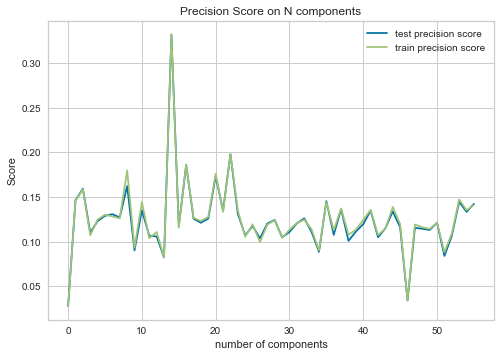

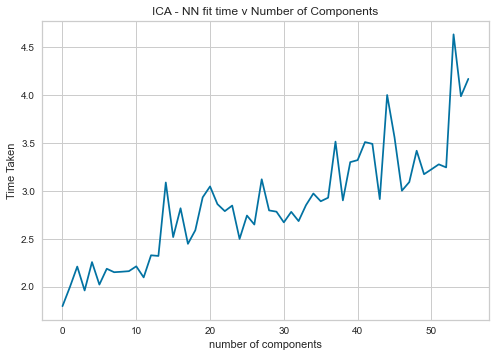

In [23]:
components = np.arange(0, 560, 10).tolist()
scores_train = []
scores_test = []
components[0] = 1
times = []
nn = MLPClassifier(activation='logistic', hidden_layer_sizes=25,
				   learning_rate_init=.3, solver='sgd', learning_rate='adaptive',
				   n_iter_no_change=20, early_stopping=True, max_iter=1000, momentum=0.3)
for component in components:
    ica = FastICA(max_iter=300, algorithm='parallel', n_components=component).fit(X_train)
    ica_train = ica.transform(X_train)
    t1 = time.time()
    nn.fit(ica_train, y_train)
    t2 = time.time()
    times.append(-(t1-t2))
    ica_test = ica.transform(X_test)
    metric_scores_test = nn.predict(ica_test)
    scores_test.append(precision_score(y_test, metric_scores_test, average="weighted"))
    metric_scores_train = nn.predict(ica_train)
    scores_train.append(precision_score(y_train, metric_scores_train, average="weighted"))

plt.plot(scores_test, label = "test precision score")
plt.plot(scores_train, label = "train precision score")
plt.xlabel('number of components')
plt.ylabel('Score')
plt.legend()
plt.title("Precision Score on N components")
plt.show()

plt.plot(times)
plt.xlabel('number of components')
plt.ylabel('Time Taken')
plt.title("ICA - NN fit time v Number of Components")
plt.show()

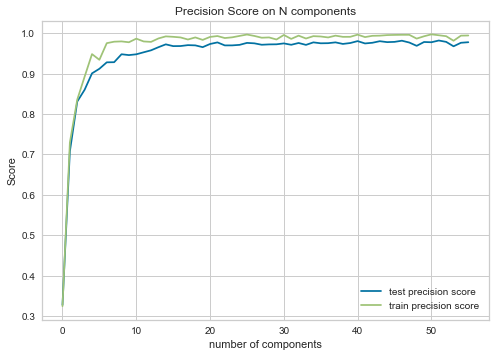

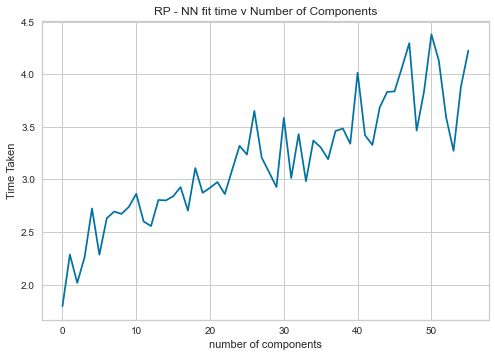

In [27]:
components = np.arange(0, 560, 10).tolist()
scores_train = []
scores_test = []
components[0] = 1
times = []
nn = MLPClassifier(activation='logistic', hidden_layer_sizes=25,
				   learning_rate_init=.3, solver='sgd', learning_rate='adaptive',
				   n_iter_no_change=20, early_stopping=True, max_iter=1000, momentum=0.3)
for component in components:
    rp = GaussianRandomProjection(n_components=component).fit(X_train)
    rp_train = rp.transform(X_train)
    t1 = time.time()
    nn.fit(rp_train, y_train)
    t2 = time.time()
    times.append(-(t1-t2))
    rp_test = rp.transform(X_test)
    metric_scores_test = nn.predict(rp_test)
    scores_test.append(precision_score(y_test, metric_scores_test, average="weighted"))
    metric_scores_train = nn.predict(rp_train)
    scores_train.append(precision_score(y_train, metric_scores_train, average="weighted"))

plt.plot(scores_test, label = "test precision score")
plt.plot(scores_train, label = "train precision score")
plt.xlabel('number of components')
plt.ylabel('Score')
plt.legend()
plt.title("Precision Score on N components")
plt.show()

plt.plot(times)
plt.xlabel('number of components')
plt.ylabel('Time Taken')
plt.title("RP - NN fit time v Number of Components")
plt.show()

hi
hi
hi
hi
hi
hi


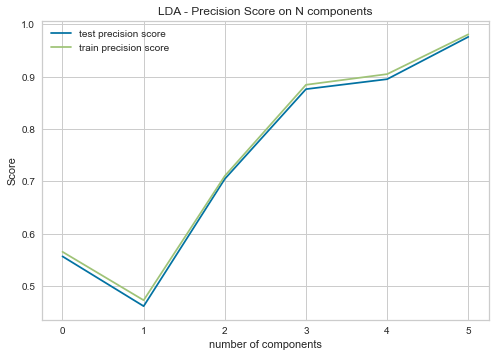

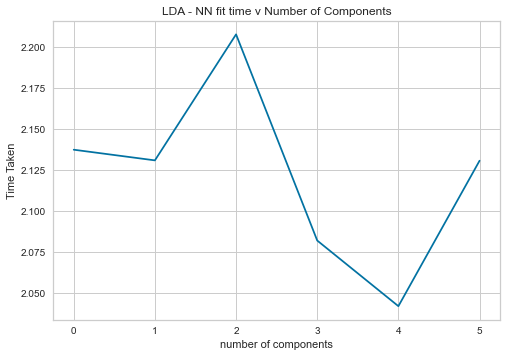

In [43]:
components = np.arange(0, 6).tolist()
scores_train = []
scores_test = []
components[0] = 1
times = []
nn = MLPClassifier(activation='logistic', hidden_layer_sizes=25,
				   learning_rate_init=.3, solver='sgd', learning_rate='adaptive',
				   n_iter_no_change=20, early_stopping=True, max_iter=1000, momentum=0.3)
for component in components:
    lda = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto', n_components=component).fit(X_train, y_train)
    lda_train = lda.transform(X_train)
    t1 = time.time()
    nn.fit(lda_train, y_train)
    t2 = time.time()
    times.append(-(t1-t2))
    lda_test = lda.transform(X_test)
    metric_scores_test = nn.predict(lda_test)
    scores_test.append(precision_score(y_test, metric_scores_test, average="weighted"))
    metric_scores_train = nn.predict(lda_train)
    scores_train.append(precision_score(y_train, metric_scores_train, average="weighted"))

plt.plot(scores_test, label = "test precision score")
plt.plot(scores_train, label = "train precision score")
plt.xlabel('number of components')
plt.ylabel('Score')
plt.legend()
plt.title("LDA - Precision Score on N components")
plt.show()

plt.plot(times)
plt.xlabel('number of components')
plt.ylabel('Time Taken')
plt.title("LDA - NN fit time v Number of Components")
plt.show()

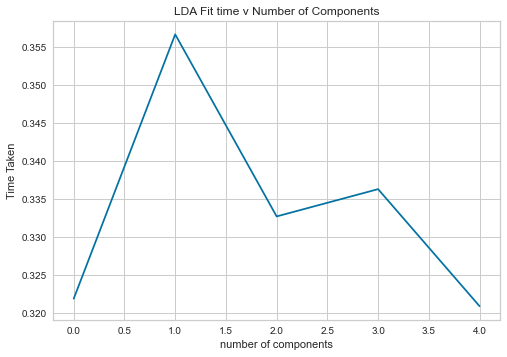

In [31]:
components = np.arange(1, 6).tolist()
# components[0] = 1
# components = range(1,560)
times = []
# print(components)
avg_LDA_scores = []
for n_components in components:
    t1 = time.time()
    lda = LinearDiscriminantAnalysis(n_components=n_components).fit(X_train, y_train)
    t2 = time.time()
    times.append(-(t1-t2))

plt.plot(times)
plt.xlabel('number of components')
plt.ylabel('Time Taken')
plt.title("LDA Fit time v Number of Components")
plt.show()

#Uncomment below to produce variance charts

# lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
# plt.plot(np.cumsum(lda.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')
# plt.title('LDA - Variance v Number of Components')
# plt.show()

# lda = LinearDiscriminantAnalysis(n_components=2).fit(X_train, y_train)
# plt.plot(np.cumsum(lda.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')
# plt.title('LDA - Variance v Number of Components')
# plt.show()

In [30]:
n_clust = 2
true_labels = y
k_means = KMeans(n_clusters = n_clust, random_state=123, n_init=10, max_iter=1000)
k_means.fit(X_scaled)
c_labels = k_means.labels_
df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
ct = pd.crosstab(df['clust_label'], df['orig_label'])
y_clust = k_means.predict(X_scaled)
display(ct)
print('% 9s' % 'inertia  homo    compl   v-meas   ARI     AMI     silhouette')
print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
  %(k_means.inertia_,
  homogeneity_score(true_labels, y_clust),
  completeness_score(true_labels, y_clust),
  v_measure_score(true_labels, y_clust),
  adjusted_rand_score(true_labels, y_clust),
  adjusted_mutual_info_score(true_labels, y_clust),
  silhouette_score(X_scaled, y_clust, metric='euclidean')))

n_clust = 5
k_means = KMeans(n_clusters = n_clust, random_state=123, n_init=10, max_iter=1000)
k_means.fit(X_scaled)
c_labels = k_means.labels_
df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
ct = pd.crosstab(df['clust_label'], df['orig_label'])
y_clust = k_means.predict(X_scaled)
display(ct)
print('% 9s' % 'inertia  homo    compl   v-meas   ARI     AMI     silhouette')
print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
  %(k_means.inertia_,
  homogeneity_score(true_labels, y_clust),
  completeness_score(true_labels, y_clust),
  v_measure_score(true_labels, y_clust),
  adjusted_rand_score(true_labels, y_clust),
  adjusted_mutual_info_score(true_labels, y_clust),
  silhouette_score(X_scaled, y_clust, metric='euclidean')))

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,12,3,0,1722,1406,1536
1,1932,1774,1906,0,0,8


inertia  homo    compl   v-meas   ARI     AMI     silhouette
3272856   0.378   0.980   0.545   0.330   0.545    0.394


orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,12,3,0,900,320,1242
1,1361,1101,921,0,0,0
2,0,0,0,745,890,297
3,571,673,985,0,0,0
4,0,0,0,77,196,5


inertia  homo    compl   v-meas   ARI     AMI     silhouette
2654790   0.417   0.514   0.461   0.291   0.460    0.129


In [22]:
pca_transform(n_comp=1, X=X_train)
k_means(n_clust=2, data_frame=X_scaled, true_labels=y_encode)

pca_transform(n_comp=200, X=X_train)
k_means(n_clust=2, data_frame=X_scaled, true_labels=y_encode)

Shape of the new Data df: (7209, 1)


orig_label,0,1,2,3,4,5
clust_label,,,,,,
0,1932,1774,1906,0,0,8
1,12,3,0,1722,1406,1536


inertia  homo    compl   v-meas   ARI     AMI     silhouette
3272856   0.378   0.980   0.545   0.330   0.545    0.394
Shape of the new Data df: (7209, 200)


orig_label,0,1,2,3,4,5
clust_label,,,,,,
0,1932,1774,1906,0,0,8
1,12,3,0,1722,1406,1536


inertia  homo    compl   v-meas   ARI     AMI     silhouette
3272856   0.378   0.980   0.545   0.330   0.545    0.394


In [23]:
pca_transform(n_comp=1, X=X_train)
k_means(n_clust=5, data_frame=X_scaled, true_labels=y_encode)

pca_transform(n_comp=200, X=X_train)
k_means(n_clust=5, data_frame=X_scaled, true_labels=y_encode)

Shape of the new Data df: (7209, 1)


orig_label,0,1,2,3,4,5
clust_label,,,,,,
0,0,0,0,77,196,5
1,570,675,997,0,0,0
2,0,0,0,745,893,299
3,1362,1099,909,0,0,0
4,12,3,0,900,317,1240


inertia  homo    compl   v-meas   ARI     AMI     silhouette
2654789   0.418   0.514   0.461   0.292   0.461    0.128
Shape of the new Data df: (7209, 200)


orig_label,0,1,2,3,4,5
clust_label,,,,,,
0,0,0,0,77,196,5
1,570,675,997,0,0,0
2,0,0,0,745,893,299
3,1362,1099,909,0,0,0
4,12,3,0,900,317,1240


inertia  homo    compl   v-meas   ARI     AMI     silhouette
2654789   0.418   0.514   0.461   0.292   0.461    0.128


Shape of the new Data df: (7209, 1)


orig_label,0,1,2,3,4,5
clust_label,,,,,,
0,367,467,730,0,0,0
1,0,0,0,53,138,4
2,9,2,0,636,229,878
3,0,0,0,516,617,199
4,985,775,604,0,0,0


inertia  homo    compl   v-meas   ARI     AMI     silhouette
1861594   0.421   0.518   0.464   0.297   0.464    0.128
Shape of the new Data df: (7209, 300)


orig_label,0,1,2,3,4,5
clust_label,,,,,,
0,367,467,730,0,0,0
1,0,0,0,53,138,4
2,9,2,0,636,229,878
3,0,0,0,516,617,199
4,985,775,604,0,0,0


inertia  homo    compl   v-meas   ARI     AMI     silhouette
1861594   0.421   0.518   0.464   0.297   0.464    0.128


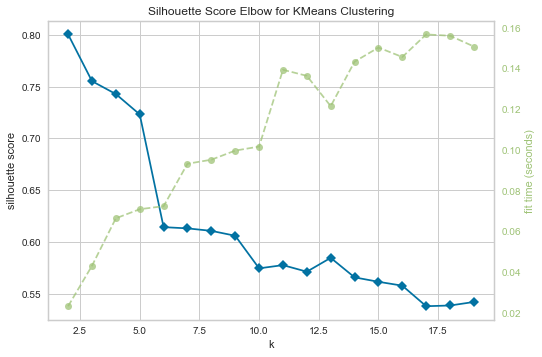

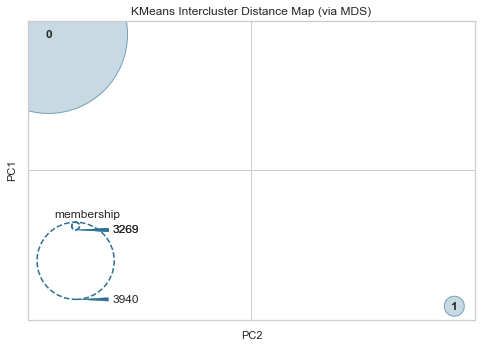

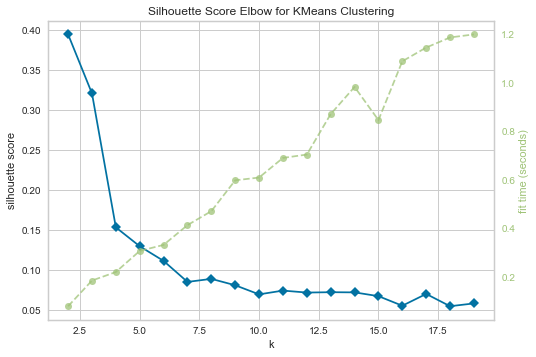

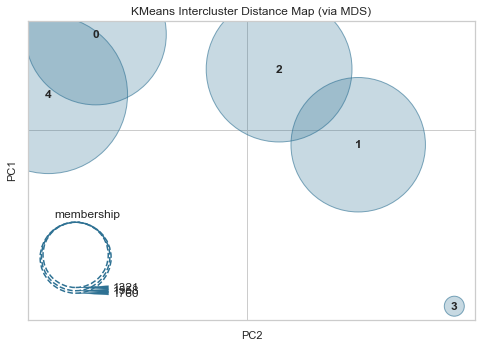

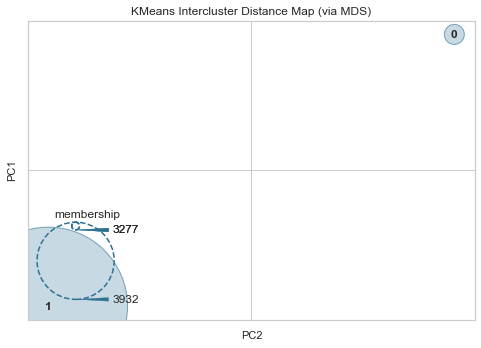

In [38]:
pca = PCA(n_components=1).fit(X_train)
pca_train = pca.transform(X_train)
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,20), metric='silhouette', locate_elbow=True)

visualizer.fit(pca_train)        # Fit the data to the visualizer
visualizer.show()

model = KMeans(2)
visualizer = InterclusterDistance(model)

visualizer.fit(pca_train)        # Fit the data to the visualizer
visualizer.show()

pca = PCA(n_components=200).fit(X_train)
pca_train = pca.transform(X_train)
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,20), metric='silhouette', locate_elbow=True)

visualizer.fit(pca_train)        # Fit the data to the visualizer
visualizer.show()

model = KMeans(5)
visualizer = InterclusterDistance(model)

visualizer.fit(pca_train)        # Fit the data to the visualizer
visualizer.show()

model = KMeans(2)
visualizer = InterclusterDistance(model)

visualizer.fit(pca_train)        # Fit the data to the visualizer
visualizer.show()

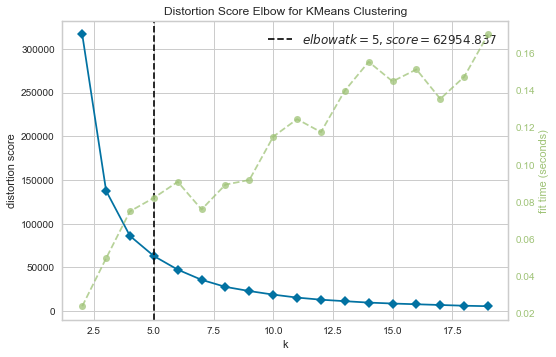

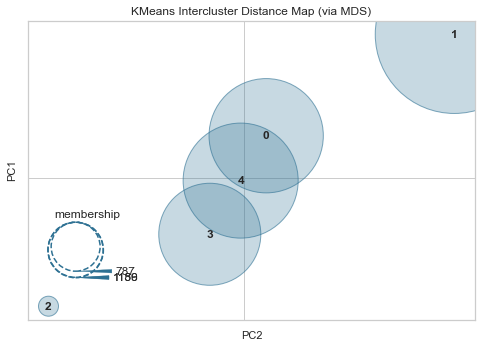

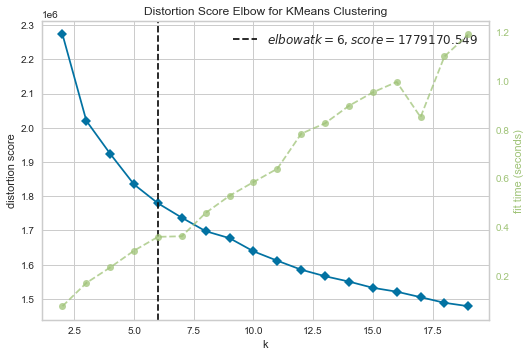

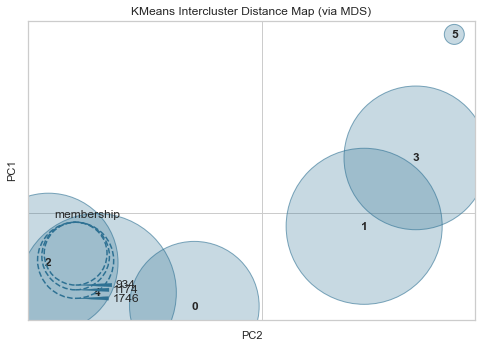

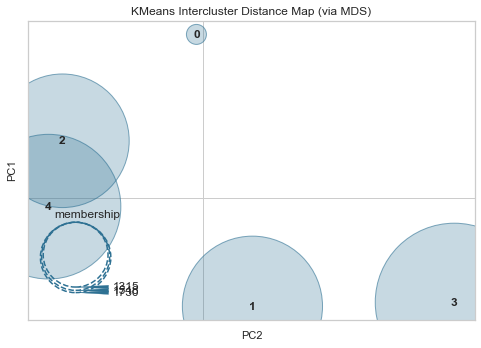

In [57]:
pca = PCA(n_components=1).fit(X_train)
pca_train = pca.transform(X_train)
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,20), metric='distortion', locate_elbow=True)

visualizer.fit(pca_train)        # Fit the data to the visualizer
visualizer.show()

model = KMeans(5)
visualizer = InterclusterDistance(model)

visualizer.fit(pca_train)        # Fit the data to the visualizer
visualizer.show()

pca = PCA(n_components=200).fit(X_train)
pca_train = pca.transform(X_train)
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,20), metric='distortion', locate_elbow=True)

visualizer.fit(pca_train)        # Fit the data to the visualizer
visualizer.show()

model = KMeans(6)
visualizer = InterclusterDistance(model)

visualizer.fit(pca_train)        # Fit the data to the visualizer
visualizer.show()

model = KMeans(5)
visualizer = InterclusterDistance(model)

visualizer.fit(pca_train)        # Fit the data to the visualizer
visualizer.show()


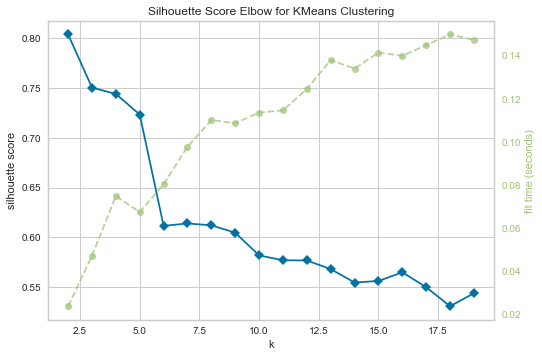

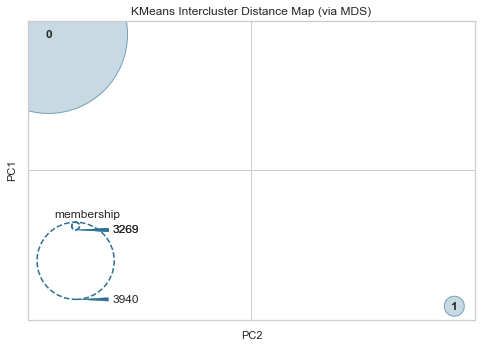

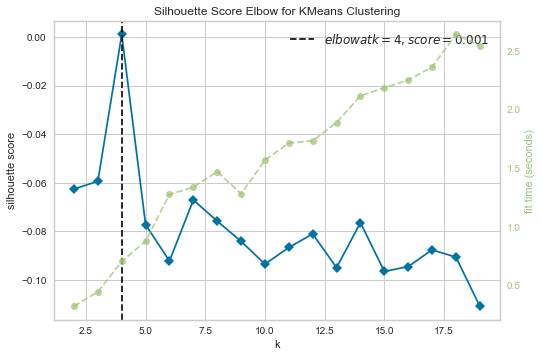

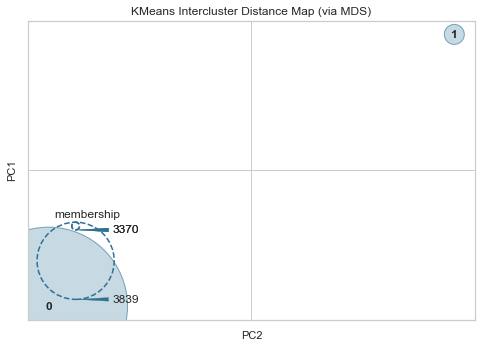

In [63]:
ica = FastICA(max_iter=300, algorithm='parallel', n_components=1).fit(X_train)
ica_train = ica.transform(X_train)
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,20), metric='silhouette', locate_elbow=True)


visualizer.fit(ica_train)        # Fit the data to the visualizer
visualizer.show()

model = KMeans(2)
visualizer = InterclusterDistance(model)

visualizer.fit(ica_train)        # Fit the data to the visualizer
visualizer.show()

ica = FastICA(max_iter=300, algorithm='parallel', n_components=480).fit(X_train)
ica_train = ica.transform(X_train)
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,20), metric='silhouette', locate_elbow=True)


visualizer.fit(ica_train)        # Fit the data to the visualizer
visualizer.show()

model = KMeans(2)
visualizer = InterclusterDistance(model)

visualizer.fit(ica_train)        # Fit the data to the visualizer
visualizer.show()

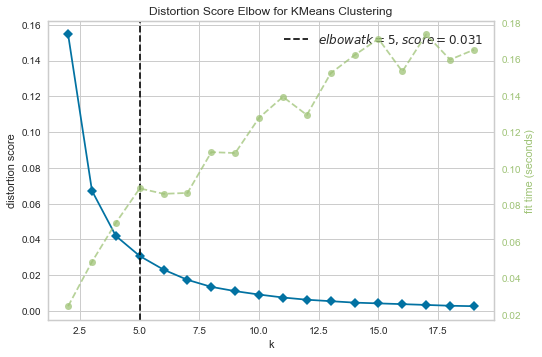

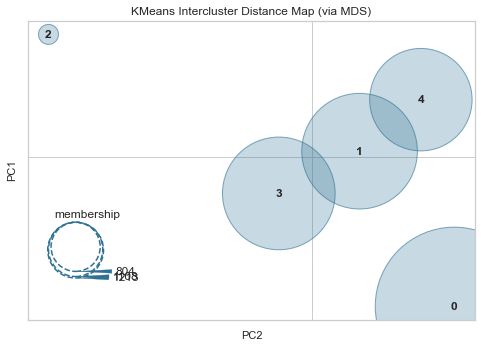

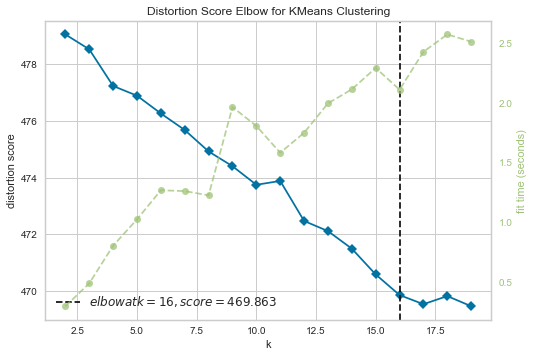

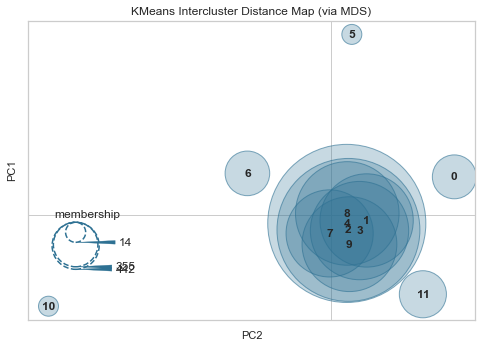

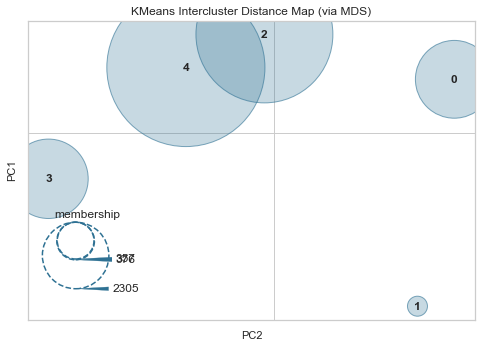

In [55]:
ica = FastICA(max_iter=300, algorithm='parallel', n_components=1).fit(X_train)
ica_train = ica.transform(X_train)
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,20), metric='distortion', locate_elbow=True)


visualizer.fit(ica_train)        # Fit the data to the visualizer
visualizer.show()

model = KMeans(5)
visualizer = InterclusterDistance(model)

visualizer.fit(ica_train)        # Fit the data to the visualizer
visualizer.show()

ica = FastICA(max_iter=300, algorithm='parallel', n_components=480).fit(X_train)
ica_train = ica.transform(X_train)
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,20), metric='distortion', locate_elbow=True)


visualizer.fit(ica_train)        # Fit the data to the visualizer
visualizer.show()

model = KMeans(12)
visualizer = InterclusterDistance(model)

visualizer.fit(ica_train)        # Fit the data to the visualizer
visualizer.show()

model = KMeans(5)
visualizer = InterclusterDistance(model)

visualizer.fit(ica_train)        # Fit the data to the visualizer
visualizer.show()

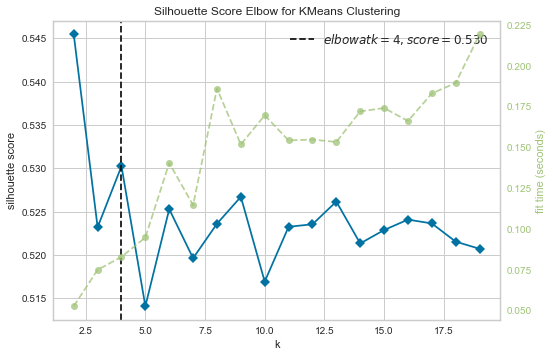

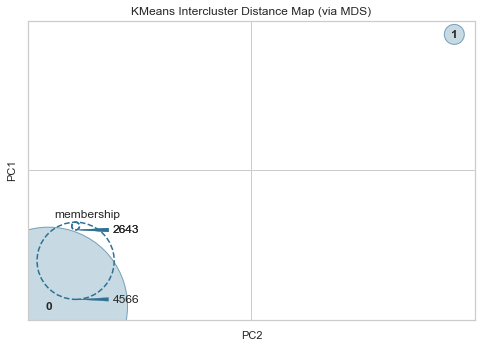

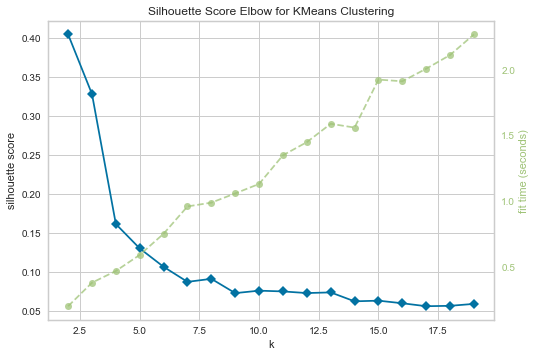

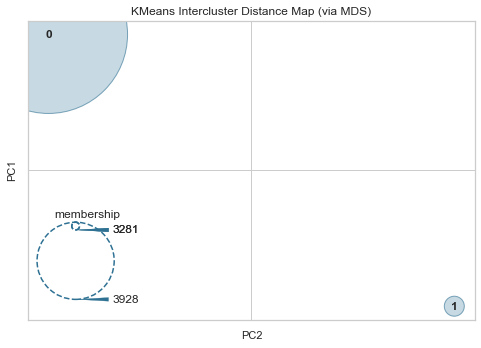

In [58]:
rca = GaussianRandomProjection(n_components=1).fit(X_train)
rca_train = rca.transform(X_train)
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,20), metric='silhouette', locate_elbow=True)


visualizer.fit(rca_train)        # Fit the data to the visualizer
visualizer.show()

model = KMeans(2)
visualizer = InterclusterDistance(model)

visualizer.fit(rca_train)        # Fit the data to the visualizer
visualizer.show()

rca = GaussianRandomProjection(n_components=450).fit(X_train)
rca_train = rca.transform(X_train)
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,20), metric='silhouette', locate_elbow=True)


visualizer.fit(rca_train)        # Fit the data to the visualizer
visualizer.show()

model = KMeans(2)
visualizer = InterclusterDistance(model)

visualizer.fit(rca_train)        # Fit the data to the visualizer
visualizer.show()

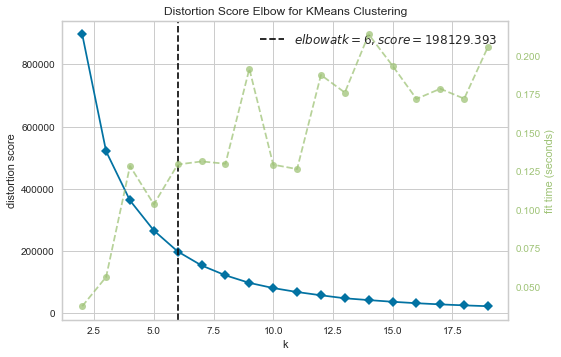

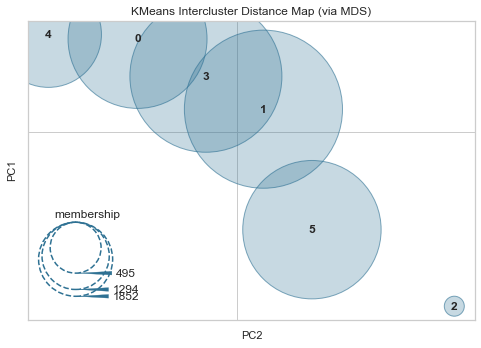

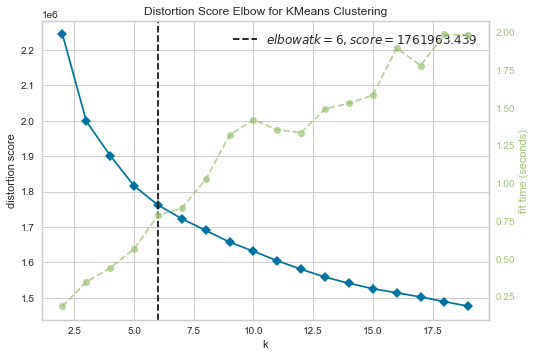

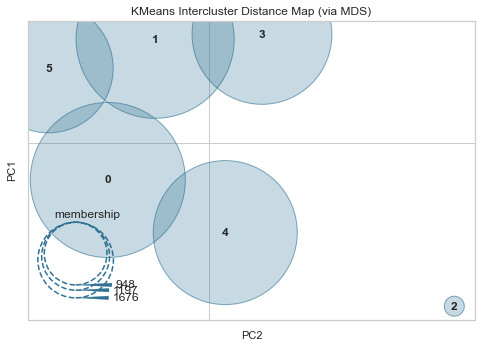

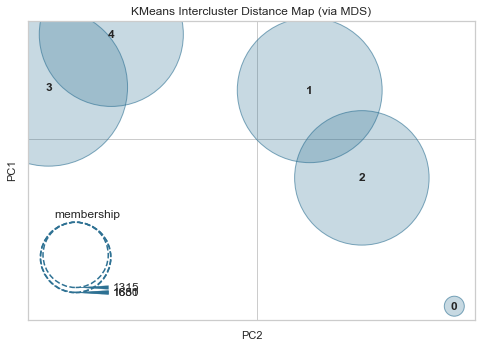

In [59]:
rca = GaussianRandomProjection(n_components=1).fit(X_train)
rca_train = rca.transform(X_train)
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,20), metric='distortion', locate_elbow=True)


visualizer.fit(rca_train)        # Fit the data to the visualizer
visualizer.show()

model = KMeans(6)
visualizer = InterclusterDistance(model)

visualizer.fit(rca_train)        # Fit the data to the visualizer
visualizer.show()

rca = GaussianRandomProjection(n_components=450).fit(X_train)
rca_train = rca.transform(X_train)
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,20), metric='distortion', locate_elbow=True)


visualizer.fit(rca_train)        # Fit the data to the visualizer
visualizer.show()

model = KMeans(6)
visualizer = InterclusterDistance(model)

visualizer.fit(rca_train)        # Fit the data to the visualizer
visualizer.show()

model = KMeans(5)
visualizer = InterclusterDistance(model)

visualizer.fit(rca_train)        # Fit the data to the visualizer
visualizer.show()

[0.7362647]


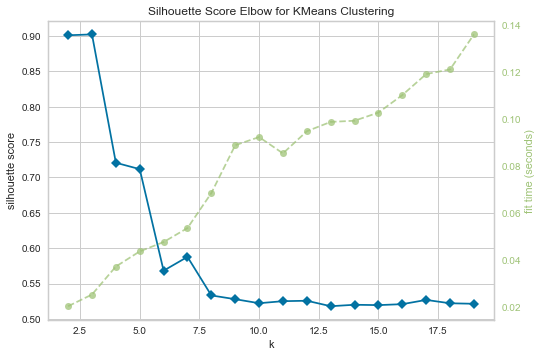

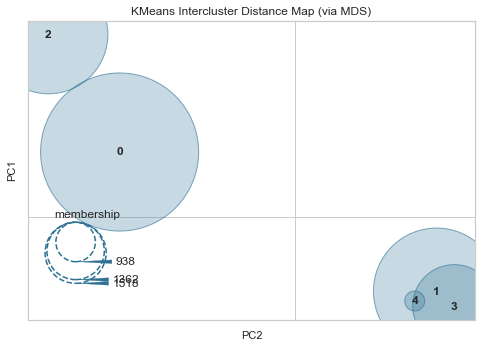

[0.7362647  0.91706667 0.96497428 0.99176166]


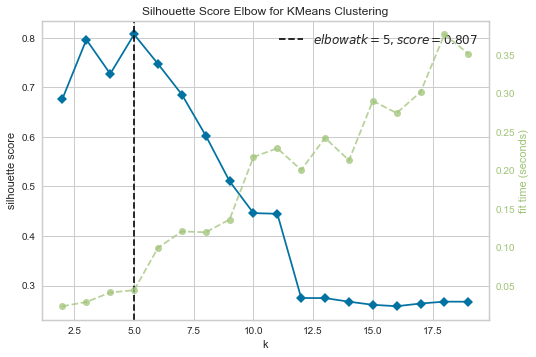

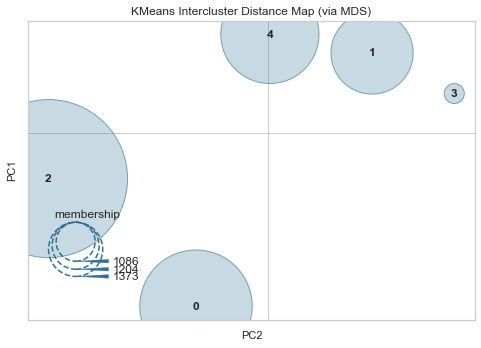

In [48]:
lda = LinearDiscriminantAnalysis(n_components=1).fit(X_train, y_train)
print(np.cumsum(lda.explained_variance_ratio_))
lda_train = lda.transform(X_train)
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,20), metric='silhouette', locate_elbow=True)


visualizer.fit(lda_train)        # Fit the data to the visualizer
visualizer.show()

model = KMeans(5)
visualizer = InterclusterDistance(model)

visualizer.fit(lda_train)        # Fit the data to the visualizer
visualizer.show()

lda = LinearDiscriminantAnalysis(n_components=4).fit(X_train, y_train)
print(np.cumsum(lda.explained_variance_ratio_))
lda_train = lda.transform(X_train)
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,20), metric='silhouette', locate_elbow=True)


visualizer.fit(lda_train)        # Fit the data to the visualizer
visualizer.show()

model = KMeans(5)
visualizer = InterclusterDistance(model)

visualizer.fit(lda_train)        # Fit the data to the visualizer
visualizer.show()

[0.7362647]


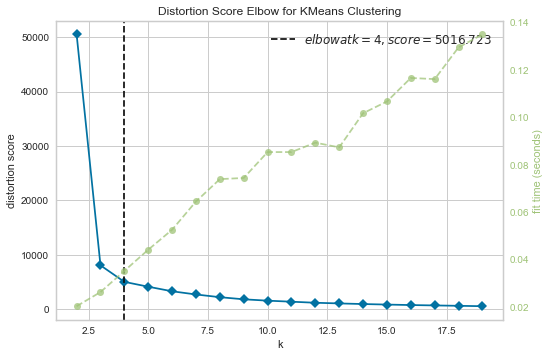

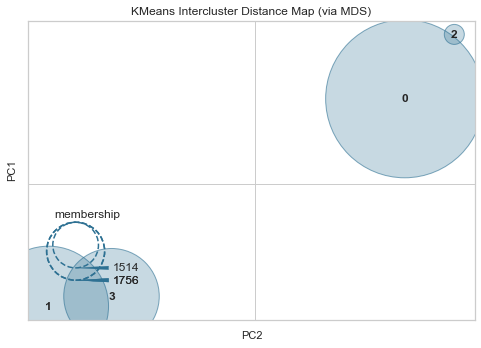

[0.7362647  0.91706667 0.96497428 0.99176166]


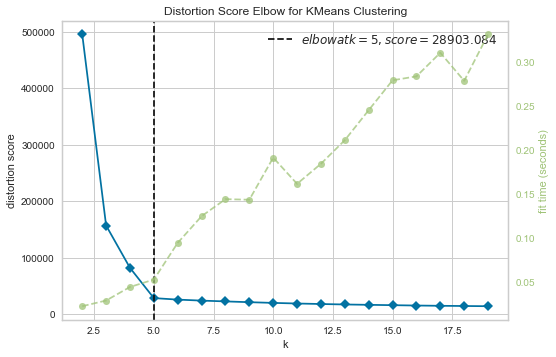

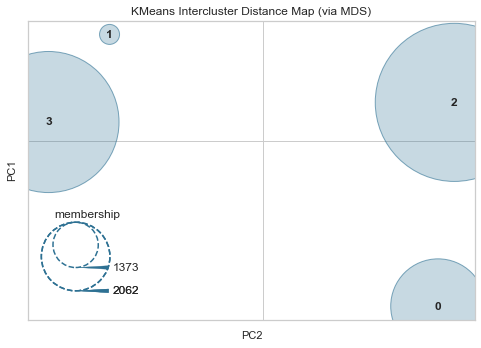

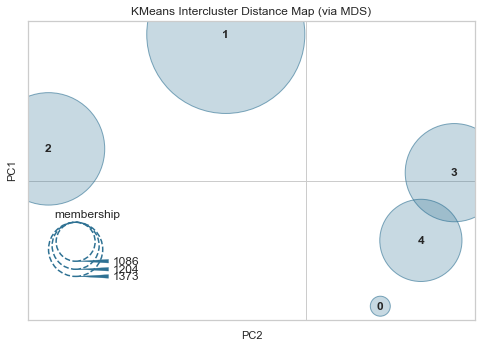

In [51]:
lda = LinearDiscriminantAnalysis(n_components=1).fit(X_train, y_train)
print(np.cumsum(lda.explained_variance_ratio_))
lda_train = lda.transform(X_train)
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,20), metric='distortion', locate_elbow=True)


visualizer.fit(lda_train)        # Fit the data to the visualizer
visualizer.show()

model = KMeans(4)
visualizer = InterclusterDistance(model)

visualizer.fit(lda_train)        # Fit the data to the visualizer
visualizer.show()

lda = LinearDiscriminantAnalysis(n_components=4).fit(X_train, y_train)
print(np.cumsum(lda.explained_variance_ratio_))
lda_train = lda.transform(X_train)
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,20), metric='distortion', locate_elbow=True)


visualizer.fit(lda_train)        # Fit the data to the visualizer
visualizer.show()

model = KMeans(4)
visualizer = InterclusterDistance(model)

visualizer.fit(lda_train)        # Fit the data to the visualizer
visualizer.show()

model = KMeans(5)
visualizer = InterclusterDistance(model)

visualizer.fit(lda_train)        # Fit the data to the visualizer
visualizer.show()

C:\Users\Stephen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Stephen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Stephen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Stephen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: Un

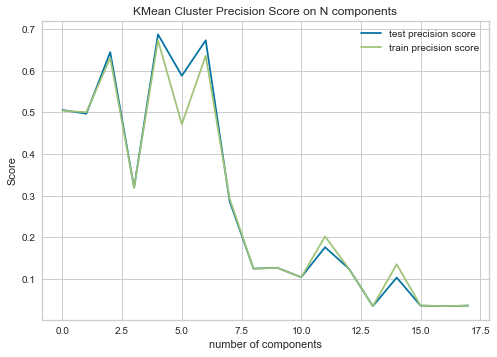

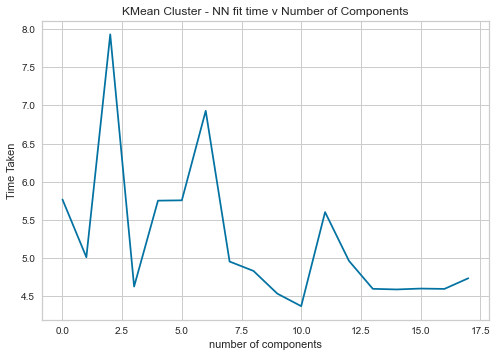

In [3]:
# pca = PCA(n_components=200).fit(X_train)
# pca_train = pca.transform(X_train)
# pca_test = pca.transform(X_test)
clusters = range(2, 20)#np.arange(2, 12, 2).tolist()
cluster_ranges = [] 
times = []
scores_train = []
scores_test = []
for cluster in clusters:
    clust = KMeans(n_clusters=cluster, max_iter=1000, random_state=1).fit(X_train)
    clust_train = clust.transform(X_train)
    clust_test = clust.transform(X_test)
    nn = MLPClassifier(activation='logistic', hidden_layer_sizes=25,
                       learning_rate_init=.3, solver='sgd', learning_rate='adaptive',
                       n_iter_no_change=50, early_stopping=True, max_iter=1000, momentum=0.3)
    t1 = time.time()
    nn.fit(clust_train, y_train)
    t2 = time.time()
    times.append(-(t1-t2))
    metric_scores_test = nn.predict(clust_test)
    scores_test.append((precision_score(y_test, metric_scores_test, average="weighted")))
    metric_scores_train = nn.predict(clust_train)
    scores_train.append((precision_score(y_train, metric_scores_train, average="weighted")))

plt.plot(scores_test, label = "test precision score")
plt.plot(scores_train, label = "train precision score")
plt.xlabel('number of components')
plt.ylabel('Score')
plt.legend()
plt.title("KMean Cluster Precision Score on N components")
plt.show()

plt.plot(times)
plt.xlabel('number of components')
plt.ylabel('Time Taken')
plt.title("KMean Cluster - NN fit time v Number of Components")
plt.show()
# print(" Score Train: ", nn.score(clust_train, y_train))

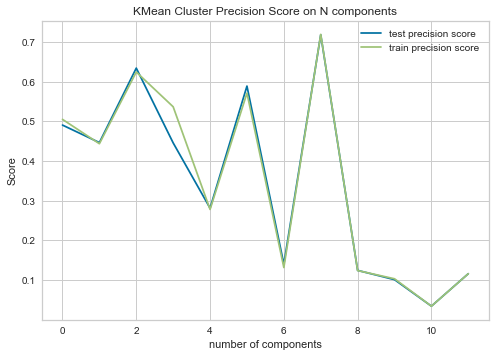

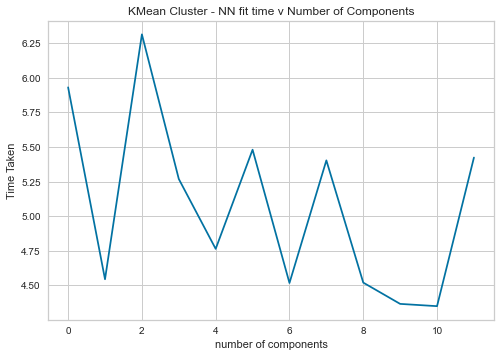

[0.53662436 0.53502094 0.45919566 0.45527069 0.52686364 0.52801259
 0.33605896 0.35286061 0.45182992]


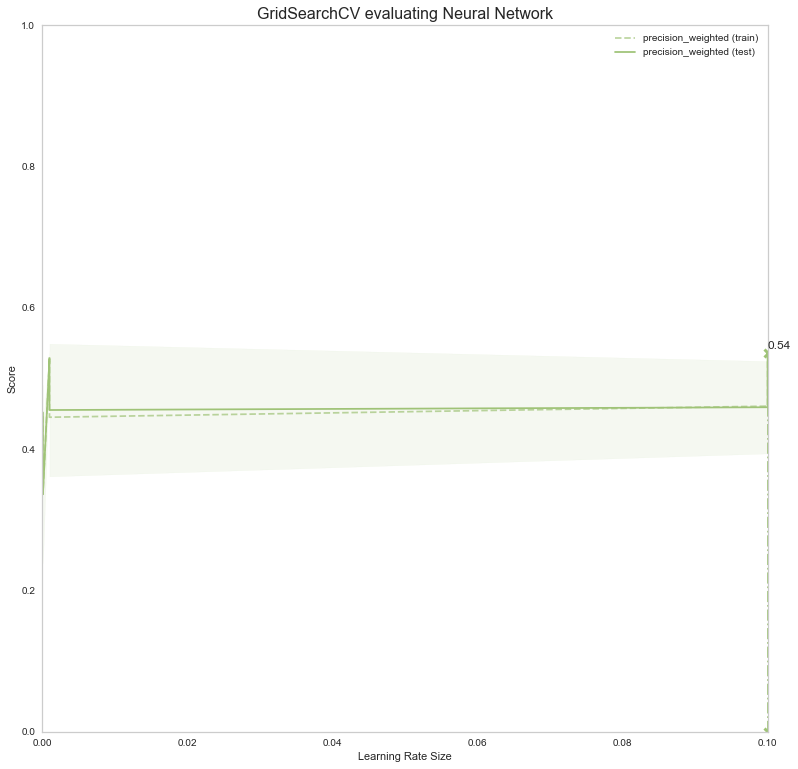

In [7]:
clust = KMeans(n_clusters=3, max_iter=1000, random_state=1).fit(X_scaled)
clust_all = clust.transform(X_scaled)
clust_train = clust.transform(X_train)
clust_test = clust.transform(X_test)
nn = MLPClassifier(activation='logistic', hidden_layer_sizes=25,
				   learning_rate_init=.3, solver='sgd', learning_rate='adaptive',
				   n_iter_no_change=50, early_stopping=True, max_iter=1000, momentum=0.3)
scoring = {'precision_weighted':make_scorer(precision_score, average='weighted')}
parameters = {'hidden_layer_sizes': [25], 'activation':['logistic'],
			  'learning_rate':['adaptive'], 'solver':['sgd'], 'learning_rate_init':[.1, .001, .0001],
              'momentum':[0.1, 0.5, 0.9], 'max_iter':[1000]}
skf = StratifiedKFold(n_splits = 5)
clf = GridSearchCV(return_train_score=True, estimator=MLPClassifier(),
 				   param_grid=parameters, cv=skf, n_jobs=-1, scoring=scoring, refit='precision_weighted')

clf.fit(X=clust_all, y=y_encode)
results = clf.cv_results_
print(results['mean_test_precision_weighted'])

plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating Neural Network",
          fontsize=16)

plt.xlabel("Learning Rate Size")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, .1)
ax.set_ylim(0, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_learning_rate_init'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
	for sample, style in (('train', '--'), ('test', '-')):
		sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
		sample_score_std = results['std_%s_%s' % (sample, scorer)]
		ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
		ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

	best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
	best_score = results['mean_test_%s' % scorer][best_index]

	# Plot a dotted vertical line at the best score for that scorer marked by x
	ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

	# Annotate the best score for that scorer
	ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

In [35]:
clust = KMeans(n_clusters=5, max_iter=1000, random_state=1).fit(X_scaled)
clust_all = clust.transform(X_scaled)
clust_train = clust.transform(X_train)
clust_test = clust.transform(X_test)
nn = MLPClassifier(activation='adam', hidden_layer_sizes=25,
				   learning_rate_init=.3, solver='sgd', learning_rate='adaptive',
				   n_iter_no_change=50, early_stopping=True, max_iter=1000, momentum=0.3)
scoring = {'precision_weighted':make_scorer(precision_score, average='weighted')}
parameters = {'hidden_layer_sizes': [25], 'activation':['logistic', 'relu', 'tanh', 'relu', 'identity'],
			  'learning_rate':['adaptive'], 'solver':['sgd'], 
              'learning_rate_init':[.001,.002,.003,.004,.005,.006,.007,.008,.009],
              #'momentum':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
              'max_iter':[1000]}
skf = StratifiedKFold(n_splits = 5)
clf = GridSearchCV(return_train_score=True, estimator=MLPClassifier(),
 				   param_grid=parameters, cv=skf, n_jobs=-1, scoring=scoring, refit='precision_weighted')

clf.fit(X=clust_all, y=y_encode)
results = clf.cv_results_
print(results['mean_test_precision_weighted'])
print(clf.best_params_)
print(clf.best_score_)


# plt.figure(figsize=(13, 13))
# plt.title("GridSearchCV evaluating Neural Network",
#           fontsize=16)

# plt.xlabel("Momentum")
# plt.ylabel("Score")

# ax = plt.gca()
# ax.set_xlim(.1, 1)
# ax.set_ylim(0, 1)

# # Get the regular numpy array from the MaskedArray
# X_axis = np.array(results['param_momentum'].data, dtype=float)

# for scorer, color in zip(sorted(scoring), ['g', 'k']):
# 	for sample, style in (('train', '--'), ('test', '-')):
# 		sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
# 		sample_score_std = results['std_%s_%s' % (sample, scorer)]
# 		ax.fill_between(X_axis, sample_score_mean - sample_score_std,
#                         sample_score_mean + sample_score_std,
#                         alpha=0.1 if sample == 'test' else 0, color=color)
# 		ax.plot(X_axis, sample_score_mean, style, color=color,
#                 alpha=1 if sample == 'test' else 0.7,
#                 label="%s (%s)" % (scorer, sample))

# 	best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
# 	best_score = results['mean_test_%s' % scorer][best_index]

# 	# Plot a dotted vertical line at the best score for that scorer marked by x
# 	ax.plot([X_axis[best_index], ] * 2, [0, best_score],
#             linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

# 	# Annotate the best score for that scorer
# 	ax.annotate("%0.2f" % best_score,
#                 (X_axis[best_index], best_score + 0.005))

# plt.legend(loc="best")
# plt.grid(False)
# pca = PCA(n_components=200).fit(X_train)
# pca_train = pca.transform(X_train)
# pca_test = pca.transform(X_test)# plt.show()

[0.61754217 0.62922052 0.62232767 0.6299973  0.62545319 0.62937243
 0.62027399 0.63071887 0.59165508 0.63346737 0.63556363 0.61268777
 0.53656649 0.54616389 0.55171278 0.43613494 0.45878785 0.14385802
 0.60936964 0.62725197 0.63029414 0.51758373 0.49009911 0.53451847
 0.38023252 0.42275382 0.49324008 0.63785502 0.64147538 0.59328122
 0.60684736 0.51218999 0.48604989 0.44761888 0.23664166 0.2511319
 0.61200371 0.61588995 0.61871435 0.61926479 0.62005942 0.62110704
 0.6186345  0.61997479 0.6213232 ]
{'activation': 'relu', 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.002, 'max_iter': 1000, 'solver': 'sgd'}


In [34]:
pca = PCA(n_components=200).fit(X_train)
pca_train = pca.transform(X_train)
pca_test = pca.transform(X_test)
clust = KMeans(n_clusters=5, max_iter=1000, random_state=1).fit(pca_train)
clust_all = clust.transform(pca_train)
# clust_train = clust.transform(X_train)
# clust_test = clust.transform(X_test)
nn = MLPClassifier(activation='adam', hidden_layer_sizes=25,
				   learning_rate_init=.3, solver='sgd', learning_rate='adaptive',
				   n_iter_no_change=50, early_stopping=True, max_iter=1000, momentum=0.3)
scoring = {'precision_weighted':make_scorer(precision_score, average='weighted')}
parameters = {'hidden_layer_sizes': [25], 'activation':['logistic', 'relu', 'tanh', 'relu', 'identity'],
			  'learning_rate':['adaptive'], 'solver':['sgd'], 
              'learning_rate_init':[.001,.002,.003,.004,.005,.006,.007,.008,.009],
              #'momentum':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
              'max_iter':[1000]}
skf = StratifiedKFold(n_splits = 5)
clf = GridSearchCV(return_train_score=True, estimator=MLPClassifier(),
 				   param_grid=parameters, cv=skf, n_jobs=-1, scoring=scoring, refit='precision_weighted')

clf.fit(X=clust_all, y=y_train)
results = clf.cv_results_
print(results['mean_test_precision_weighted'])
print(clf.best_params_)
print(clf.best_score_)

# plt.figure(figsize=(13, 13))
# plt.title("GridSearchCV evaluating Neural Network",
#           fontsize=16)

# plt.xlabel("Momentum")
# plt.ylabel("Score")

# ax = plt.gca()
# ax.set_xlim(.1, 1)
# ax.set_ylim(0, 1)

# # Get the regular numpy array from the MaskedArray
# X_axis = np.array(results['param_momentum'].data, dtype=float)

# for scorer, color in zip(sorted(scoring), ['g', 'k']):
# 	for sample, style in (('train', '--'), ('test', '-')):
# 		sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
# 		sample_score_std = results['std_%s_%s' % (sample, scorer)]
# 		ax.fill_between(X_axis, sample_score_mean - sample_score_std,
#                         sample_score_mean + sample_score_std,
#                         alpha=0.1 if sample == 'test' else 0, color=color)
# 		ax.plot(X_axis, sample_score_mean, style, color=color,
#                 alpha=1 if sample == 'test' else 0.7,
#                 label="%s (%s)" % (scorer, sample))

# 	best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
# 	best_score = results['mean_test_%s' % scorer][best_index]

# 	# Plot a dotted vertical line at the best score for that scorer marked by x
# 	ax.plot([X_axis[best_index], ] * 2, [0, best_score],
#             linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

# 	# Annotate the best score for that scorer
# 	ax.annotate("%0.2f" % best_score,
#                 (X_axis[best_index], best_score + 0.005))

# plt.legend(loc="best")
# plt.grid(False)
# plt.show()

KeyboardInterrupt: 